In [6]:
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 10.3 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=5bedd53f6c16ab8e8570408f8de

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla_data = yf.download('TSLA')

# Reset index
tesla_data.reset_index(inplace=True)

# Display first 5 rows
tesla_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12284\3925846666.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download('TSLA')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2025-08-27,349.600006,355.390015,349.160004,351.940002,65519000
1,2025-08-28,345.980011,353.549988,340.260010,350.910004,67903200
2,2025-08-29,333.869995,348.750000,331.700012,347.230011,81145700
3,2025-09-02,329.359985,333.329987,325.600006,328.230011,58392000
4,2025-09-03,334.089996,343.329987,328.510010,335.200012,88733300


In [5]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Add headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/91.0.4472.124 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables on the page
tables = pd.read_html(str(soup))

print("Number of tables found:", len(tables))

# Inspect the tables to identify the correct one
for i, tbl in enumerate(tables):
    print(f"\nTable {i}:\n", tbl.head())

# Tesla quarterly revenue is usually table[1]
tesla_revenue = tables[1].copy()
tesla_revenue.columns = ["Date", "Revenue"]

# Clean revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({r'\$': '', ',': ''}, regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""].dropna()
tesla_revenue.reset_index(drop=True, inplace=True)

# Show last 5 rows
print(tesla_revenue.tail())
# Reset index
tesla_revenue.reset_index(drop=True, inplace=True)

# Display last 5 rows
tesla_revenue.tail()

Number of tables found: 6

Table 0:
    Tesla Annual Revenue (Millions of US $)  \
0                                     2024   
1                                     2023   
2                                     2022   
3                                     2021   
4                                     2020   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $97,690  
1                                   $96,773  
2                                   $81,462  
3                                   $53,823  
4                                   $31,536  

Table 1:
   Tesla Quarterly Revenue (Millions of US $)  \
0                                 2025-06-30   
1                                 2025-03-31   
2                                 2024-12-31   
3                                 2024-09-30   
4                                 2024-06-30   

  Tesla Quarterly Revenue (Millions of US $).1  
0                                      $22,496  
1           

C:\Users\Admin\AppData\Local\Temp\ipykernel_12284\904393005.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


,Date,Revenue
59,2010-09-30,31
60,2010-06-30,28
61,2010-03-31,21
62,2009-09-30,46
63,2009-06-30,27


In [6]:
# Question 3: Use yfinance to Extract Stock Data

import yfinance as yf
import pandas as pd

# Download GME stock data
gme_data = yf.download('GME')

# Reset index
gme_data.reset_index(inplace=True)

# Display first 5 rows
gme_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12284\3489185002.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download('GME')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2025-08-27,22.500000,22.58,22.270000,22.459999,6892000
1,2025-08-28,22.790001,22.90,22.370001,22.559999,6482300
2,2025-08-29,22.410000,22.82,22.410000,22.719999,5371500
3,2025-09-02,23.410000,23.41,22.180000,22.360001,9567000
4,2025-09-03,22.879999,23.73,22.680000,23.510000,9771400


In [7]:
# Question 4: Use Webscraping to Extract GME Revenue Data

import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL for GameStop revenue on Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Add headers to mimic a browser (prevents HTTP 403)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/91.0.4472.124 Safari/537.36"
}

# Get page content
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Read all tables on the page
tables = pd.read_html(str(soup))

# Inspect tables to pick the correct one (usually Table 1: Quarterly Revenue)
gme_revenue = tables[1].copy()
gme_revenue.columns = ["Date", "Revenue"]

# Clean Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({r'\$': '', ',': ''}, regex=True)

# Drop empty rows
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue.dropna(inplace=True)

# Reset index
gme_revenue.reset_index(drop=True, inplace=True)

# Display last 5 rows
gme_revenue.tail()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12284\2031405380.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


,Date,Revenue
62,2010-01-31,3524
63,2009-10-31,1835
64,2009-07-31,1739
65,2009-04-30,1981
66,2009-01-31,3492


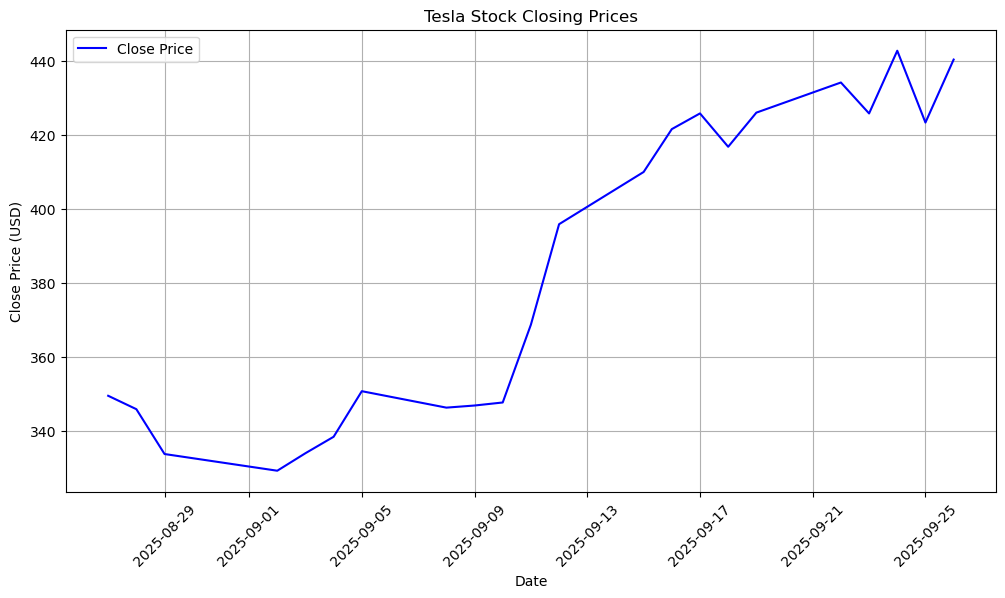

In [8]:
# Question 5: Plot Tesla Stock Graph

import matplotlib.pyplot as plt

# Define make_graph function
def make_graph(stock_data, title):
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# Call function with Tesla stock data
make_graph(tesla_data, "Tesla Stock Closing Prices")

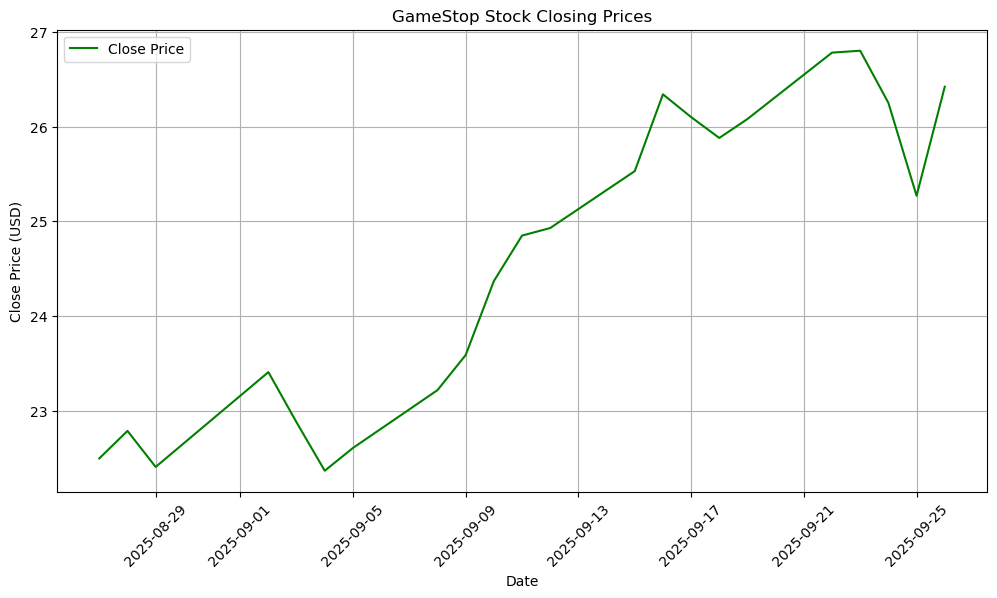

In [9]:
# Question 6: Plot GameStop Stock Graph

import matplotlib.pyplot as plt

# Reuse the make_graph function
def make_graph(stock_data, title):
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# Call function with GME stock data
make_graph(gme_data, "GameStop Stock Closing Prices")